In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

# Question 2

# Question 3

First we define functions for the four methods.

In [2]:
from pna.root import bisect, regula_falsi, illinois, newton_raphson

%psource bisect

def bisect(f, a, b, tol):
    count = 0
    while abs(b - a) > tol:
        count += 1
        c = 0.5 * (a + b)
        f_c = f(c)
        if abs(f_c) < tol:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, count


In [3]:
%psource regula_falsi

def regula_falsi(f, a, b, tol):
    count = 0
    while abs(b - a) > tol:
        f_a = f(a)
        f_b = f(b)
        c = (a * f_b - b * f_a) / (f_b - f_a)
        f_c = f(c)
        count += 1
        if abs(f_c) < tol:
            break
        elif f_a * f_c < 0:
            b = c
        else:
            a = c
    return c, count


In [4]:
%psource illinois

def illinois(f, a, b, tol):
    count = 0
    right = True
    count = 0
    while abs(b - a) > tol:
        f_a = f(a)
        f_b = f(b)
        if count > 1:
            if right:
                f_b /= 2
            else:
                f_a /= 2
        c = (a * f_b - b * f_a) / (f_b - f_a)
        f_c = f(c)
        count += 1
        if abs(f_c) < tol:
            break
        elif f_a * f(c) < 0:
            b = c
            if right:
                right_count = 0
            else:
                count += 1
            right = False
        else:
            a = c
            if not right:
                count = 0
            else:
                count += 1
            right = True
    return c, count


In [5]:
%psource newton_raphson

def newton_raphson(f, f_prime, x0, tol):
    k = 0
    x = x0
    while abs(x) > tol:
        x -= f(x) / f_prime(x)
        k += 1
    return x, k


The plot $f(x)$ over the interval $[0,4]$ to determine valid brackets of the roots.

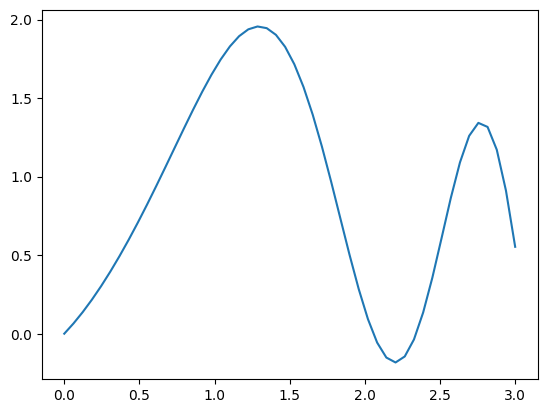

In [6]:
f = lambda x: np.sin(x) + np.sin(x**2)

x = np.linspace(0, 3)

fig, ax = plt.subplots()
ax.plot(x, f(x))

We see that there are three roots bracketed by $[-0.25, 0.25]$, $[2, 2.2]$ and $[2.2, 2.5]$. Using this we can calculate the roots using each of the methods.

In [11]:
f_prime = lambda x : np.cos(x) + 2*x*np.cos(x)

brackets = [(-0.25, 0.25), (2,2.2), (2.2,2.5)]
tol = 1e-3

for i, bracket in enumerate(brackets):
    print(f"\n\nRoot {i+1}, bracketed by {bracket}")

    x_star, iterations =  bisect(f, *bracket, tol)
    print(f"Bisection: {x_star=}, {iterations=}")
    x_star, iterations =  regula_falsi(f, *bracket, tol)
    print(f"Regula Falsi: {x_star=}, {iterations=}")
    x_star, iterations =  illinois(f, *bracket, tol)
    print(f"Illinois: {x_star=}, {iterations=}")
    x_star, iterations =  newton_raphson(f, f_prime, bracket[1], tol)
    print(f"Newton Raphson: {x_star=}, {iterations=}")



Root 1, bracketed by (-0.25, 0.25)
Bisection: x_star=0.0, iterations=1
Regula Falsi: x_star=-0.0004912201661325964, iterations=4
Illinois: x_star=-0.0003537984846328465, iterations=1
Newton Raphson: x_star=1.545130894920919e-06, iterations=3


Root 2, bracketed by (2, 2.2)
Bisection: x_star=2.05625, iterations=5
Regula Falsi: x_star=2.0560878896814354, iterations=4
Illinois: x_star=2.0560527049276547, iterations=1


KeyboardInterrupt: 

# Question 4